In [1]:
from mplsoccer.pitch import Pitch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import os

# Load the data

In [2]:
# load away data
link1 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv')
df_away = pd.read_csv(link1,skiprows=2)
df_away.sort_values('Time [s]', inplace=True)

# load home data
link2 = ('https://raw.githubusercontent.com/metrica-sports/sample-data/master/'
         'data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv')
df_home = pd.read_csv(link2,skiprows=2)
df_home.sort_values('Time [s]', inplace=True)

# Reset the column names

In [3]:
# column names aren't great so this sets the player ones with _x and _y suffixes
def set_col_names(df):
    cols = list(np.repeat(df.columns[3::2],2))
    cols = [col+'_x' if i%2==0 else col+'_y' for i, col in enumerate(cols)]
    cols = np.concatenate([df.columns[:3],cols])
    df.columns = cols
    
set_col_names(df_away)
set_col_names(df_home)

# Subset 10 seconds of data

In [4]:
# get a subset of the data (10 seconds)
df_away = df_away[(df_away['Time [s]'] > 815) & ((df_away['Time [s]'] <= 825))].copy()
df_home = df_home[(df_home['Time [s]'] > 815) & ((df_home['Time [s]'] <= 825))].copy()

# Split off the ball data, and drop the ball columns from the df_away/ df_home dataframes

In [5]:
# split off a df_ball dataframe and drop the ball columns from the player dataframes
df_ball = df_away[['Period','Frame','Time [s]', 'Ball_x', 'Ball_y']].copy()
df_home.drop(['Ball_x','Ball_y'],axis=1,inplace=True)
df_away.drop(['Ball_x','Ball_y'],axis=1,inplace=True)
df_ball.rename({'Ball_x':'x','Ball_y':'y'},axis=1,inplace=True)

In [6]:
df_home.head()

,Period,Frame,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,...,Player9_x,Player9_y,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y
20375,1,20376,815.04,0.05032,0.44915,0.18833,0.51248,0.18730,0.38975,0.21524,...,0.48396,0.44050,0.39622,0.27212,NaN,NaN,NaN,NaN,NaN,NaN
20376,1,20377,815.08,0.05007,0.44915,0.18755,0.51282,0.18637,0.39029,0.21429,...,0.48361,0.44119,0.39518,0.27257,NaN,NaN,NaN,NaN,NaN,NaN
20377,1,20378,815.12,0.04982,0.44915,0.18681,0.51315,0.18546,0.39084,0.21335,...,0.48328,0.44185,0.39417,0.27300,NaN,NaN,NaN,NaN,NaN,NaN
20378,1,20379,815.16,0.04958,0.44915,0.18607,0.51350,0.18456,0.39141,0.21239,...,0.48297,0.44259,0.39316,0.27341,NaN,NaN,NaN,NaN,NaN,NaN
20379,1,20380,815.20,0.04935,0.44916,0.18538,0.51389,0.18368,0.39195,0.21141,...,0.48266,0.44330,0.39215,0.27392,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_away.head()

,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player23_x,Player23_y,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y
20375,1,20376,815.04,0.82054,0.45899,0.52258,0.15109,0.52911,0.31197,0.48110,...,0.24593,0.17483,0.22145,0.40139,NaN,NaN,NaN,NaN,NaN,NaN
20376,1,20377,815.08,0.81996,0.45888,0.52184,0.15123,0.52849,0.31188,0.48093,...,0.24556,0.17482,0.22071,0.40247,NaN,NaN,NaN,NaN,NaN,NaN
20377,1,20378,815.12,0.81938,0.45877,0.52109,0.15136,0.52789,0.31177,0.48076,...,0.24522,0.17475,0.21997,0.40347,NaN,NaN,NaN,NaN,NaN,NaN
20378,1,20379,815.16,0.81883,0.45867,0.52033,0.15147,0.52727,0.31169,0.48061,...,0.24489,0.17472,0.21927,0.40448,NaN,NaN,NaN,NaN,NaN,NaN
20379,1,20380,815.20,0.81830,0.45854,0.51957,0.15162,0.52667,0.31165,0.48045,...,0.24456,0.17458,0.21859,0.40545,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_ball.head()

,Period,Frame,Time [s],x,y
20375,1,20376,815.04,0.23729,0.11115
20376,1,20377,815.08,0.23415,0.10919
20377,1,20378,815.12,0.23102,0.10723
20378,1,20379,815.16,0.22789,0.10528
20379,1,20380,815.20,0.22475,0.10332


# Convert to long form. So each row is a single player's coordinates for a single frame

In [9]:
# convert to long form from wide form
def to_long_form(df):
    df = pd.melt(df, id_vars=df.columns[:3], value_vars=df.columns[3:], var_name = 'player')
    df.loc[df.player.str.contains('_x'),'coordinate'] = 'x'
    df.loc[df.player.str.contains('_y'),'coordinate'] = 'y'
    df = df.dropna(axis=0, how='any')
    df['player'] = df.player.str[6:-2]
    df = (df.set_index(['Period','Frame','Time [s]','player','coordinate'])['value']
          .unstack()
          .reset_index()
          .rename_axis(None, axis=1))
    return df

df_away = to_long_form(df_away)
df_home = to_long_form(df_home)

In [10]:
df_away.head()

,Period,Frame,Time [s],player,x,y
0,1,20376,815.04,15,0.52258,0.15109
1,1,20376,815.04,16,0.52911,0.31197
2,1,20376,815.04,17,0.48110,0.45105
3,1,20376,815.04,18,0.38349,0.04675
4,1,20376,815.04,19,0.25701,0.07325


In [11]:
df_home.head()

,Period,Frame,Time [s],player,x,y
0,1,20376,815.04,1,0.18833,0.51248
1,1,20376,815.04,10,0.39622,0.27212
2,1,20376,815.04,11,0.05032,0.44915
3,1,20376,815.04,2,0.18730,0.38975
4,1,20376,815.04,3,0.21524,0.21599


In [12]:
df_ball.head()

,Period,Frame,Time [s],x,y
20375,1,20376,815.04,0.23729,0.11115
20376,1,20377,815.08,0.23415,0.10919
20377,1,20378,815.12,0.23102,0.10723
20378,1,20379,815.16,0.22789,0.10528
20379,1,20380,815.20,0.22475,0.10332


# Plot the animation

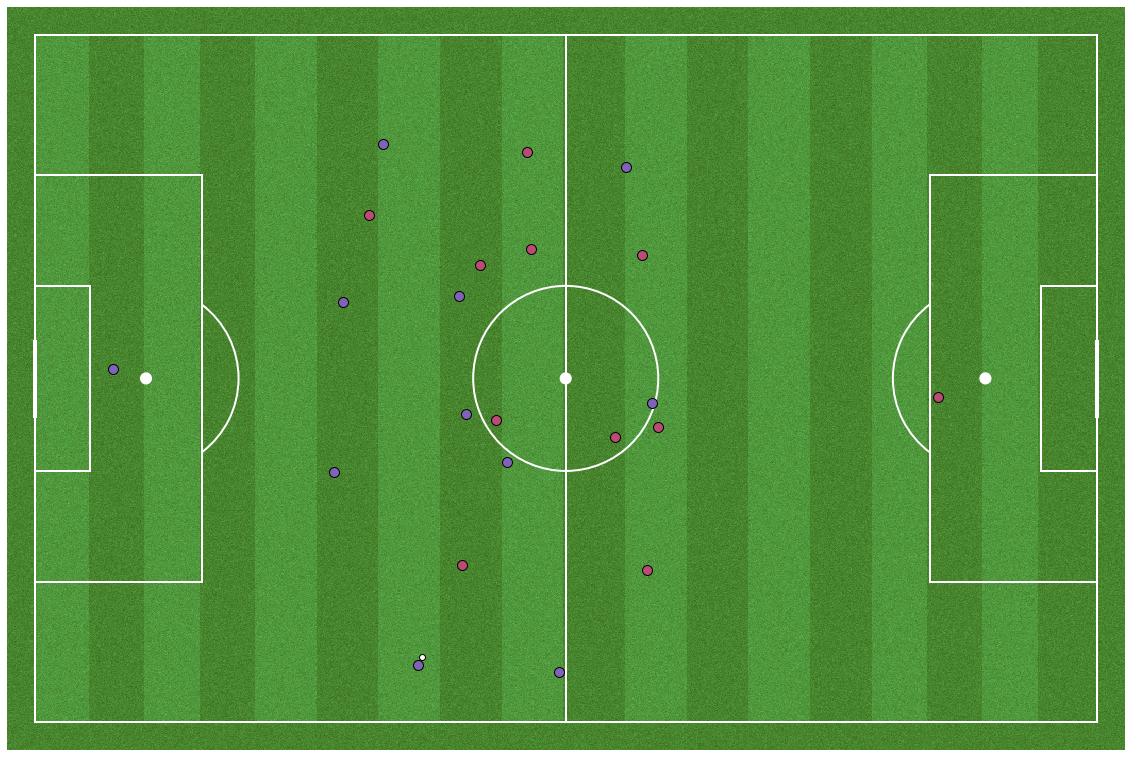

In [13]:
# First set up the figure, the axis
pitch = Pitch(pitch_type='metricasports', figsize=(16,10.4), pitch_color='grass',
              pitch_width=68, pitch_length=105, goal_type='line', stripe = True)
fig, ax = pitch.draw()

# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker':'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = pitch.plot([], [], ms=6, markerfacecolor='w', zorder=3, ax=ax, **marker_kwargs)
away, = pitch.plot([], [], ms=10, markerfacecolor='#b94b75', ax=ax, **marker_kwargs) #red/maroon
home, = pitch.plot([], [], ms=10, markerfacecolor='#7f63b8', ax=ax, **marker_kwargs) #purple

# initialization function: plot on the background for each frame
def init():
    ball.set_data([], [])
    away.set_data([], [])
    home.set_data([], [])
    return ball,away,home

# animation function
def animate(i):
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i,3], df_ball.iloc[i,4])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i,1]
    # set the player data using the frame id
    away.set_data(df_away.loc[df_away.Frame==frame,'x'],
                  df_away.loc[df_away.Frame==frame,'y'])
    home.set_data(df_home.loc[df_home.Frame==frame,'x'],
                  df_home.loc[df_home.Frame==frame,'y']) 
    return ball, away, home

# call the animator, animate so 25 frames per second
# note that its hard to get the ffmpeg requirements right.
# I installed from conda-forge: see the environment.yml file in the docs folder
anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), init_func=init, interval=50,
                               blit=True, repeat=False)
anim.save(os.path.join('figures','README_animation_example.mp4'), dpi=300, fps=25,
          extra_args=['-vcodec', 'libx264'],
          savefig_kwargs={'pad_inches':0, 'facecolor':'#457E29'})